Project 1 - Data Vizualization 

In [154]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import datetime as dt


In [ ]:
#Getting Household Firearm Ownership Rate data from the excel file

data = pd.read_excel('Firearm_Own.xlsx', sheet_name=1)

data_2016 = data[data['Year'] == 2016]
data_2016 = data_2016[['Year', 'STATE', 'HFR']]
data_2016.head()


,Year,STATE,HFR
36,2016,Alabama,0.528
73,2016,Alaska,0.572
110,2016,Arizona,0.360
147,2016,Arkansas,0.518
184,2016,California,0.163


In [ ]:
#Getting the Unintentional Death Rate data from the excel file
data2 = pd.read_excel('UDL_D.xlsx')
data2.head()


,Notes,State,State Code,Deaths,Population,Crude Rate
0,NaN,Alabama,1.0,1310.0,4715422.0,27.8
1,NaN,Alaska,2.0,306.0,774924.0,39.5
2,NaN,Arizona,4.0,2001.0,6931196.0,28.9
3,NaN,Arkansas,5.0,899.0,2943937.0,30.5
4,NaN,California,6.0,6650.0,39140914.0,17.0


In [ ]:
#Merging the 2 dataframes on the 'STATE' column

merged_data = pd.merge(data_2016, data2, left_on='STATE', right_on='State', how='inner')
merged_data.head()


,Year,STATE,HFR,Notes,State,State Code,Deaths,Population,Crude Rate
0,2016,Alabama,0.528,NaN,Alabama,1.0,1310.0,4715422.0,27.8
1,2016,Alaska,0.572,NaN,Alaska,2.0,306.0,774924.0,39.5
2,2016,Arizona,0.360,NaN,Arizona,4.0,2001.0,6931196.0,28.9
3,2016,Arkansas,0.518,NaN,Arkansas,5.0,899.0,2943937.0,30.5
4,2016,California,0.163,NaN,California,6.0,6650.0,39140914.0,17.0


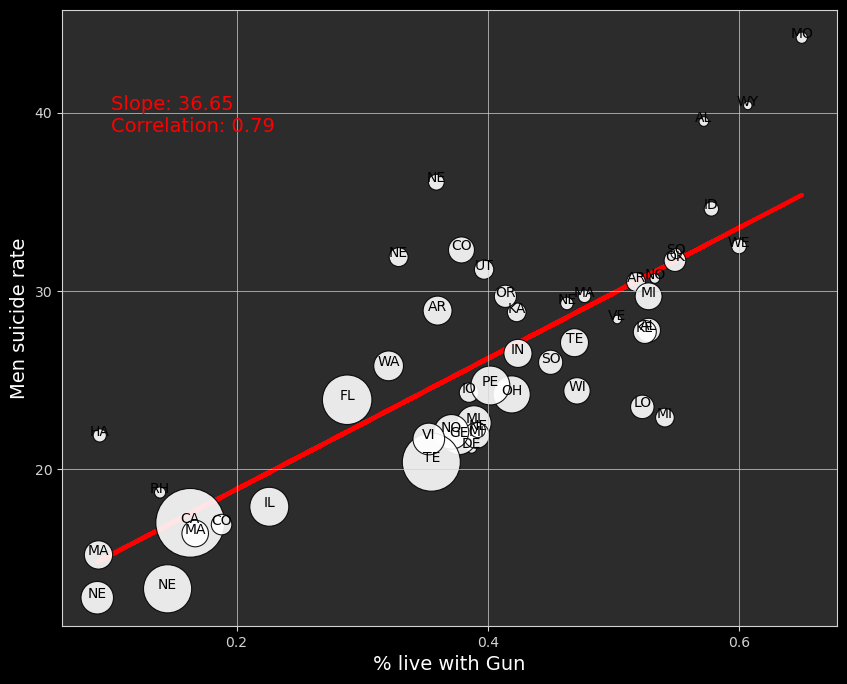

In [ ]:
#Figure 1 is the replication of the original Data Viz.

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

ax.scatter(merged_data['HFR'], merged_data['Crude Rate'], color='white', alpha=0.9, s=merged_data['Population'] / 16000, edgecolors='black', linewidth=0.8)
  
ax.plot(merged_data['HFR'], m * merged_data['HFR'] + b, color='red', linewidth=3, linestyle='solid', zorder=0)

for i, row in merged_data.iterrows():
    x, y = row['HFR'], row['Crude Rate']
    state_abbr = row['STATE'][:2].upper()
    radius = np.sqrt(row['Population']) / 80

    text_color = 'black' if radius > 0.02 else 'lightgrey'
    y_offset = 0 if radius > 0.02 else radius + 0.015  

    text = ax.text(x + x_offset, y + y_offset, state_abbr, fontsize=10, ha='center', color=text_color)
    texts.append(text)


#Axis Labels
ax.set_xlabel('% live with Gun', fontsize=14, color='white')
ax.set_ylabel('Men suicide rate', fontsize=14, color='white')
ax.grid(color='lightgrey', linestyle='-', linewidth=0.5)
ax.tick_params(axis='x', colors='lightgrey')
ax.tick_params(axis='y', colors='lightgrey')

for spine in ax.spines.values():
    spine.set_edgecolor('lightgrey')
    
ax.set_yticks([20,30,40])
ax.set_xticks([0.2,0.4,0.6])

#Adding Correlation and Slope to chart, then aligning 
correlation = merged_data['HFR'].corr(merged_data['Crude Rate'])
textstr = f'Slope: {m:.2f}\nCorrelation: {correlation:.2f}'
props = dict(boxstyle='round', facecolor='black', alpha=0.5)
ax.text(0.1, 41, textstr, fontsize=14, verticalalignment='top', color='red')

#Coloring hte background
ax.set_facecolor('#2c2c2c')
fig.patch.set_facecolor('black')

plt.show()


For the above visualization I had a lot of trouble getting the labels to be aligned how they were in the original piece of work. I wanted them to be white if they wouldn't fit in the center of the circle. Also, the labels were supposed to be centered or moved over if they would overlap. That was the only piece of the visualization that I was not able to replicate. in terms of the color the background, I looked on matplotlibs different list of colors to get them matching. I also used chat gpt. This #2c2c2c was best match that made sense to me. 

/var/folders/s1/n0q5fh9s5m77hjt_c78j17w00000gn/T/ipykernel_59891/2404427619.py:45: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax1.legend(handles=[bars1[0]], loc='upper left', fontsize=14)
/var/folders/s1/n0q5fh9s5m77hjt_c78j17w00000gn/T/ipykernel_59891/2404427619.py:46: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  ax2.legend(handles=[bars2[0]], loc='upper right', fontsize=14)


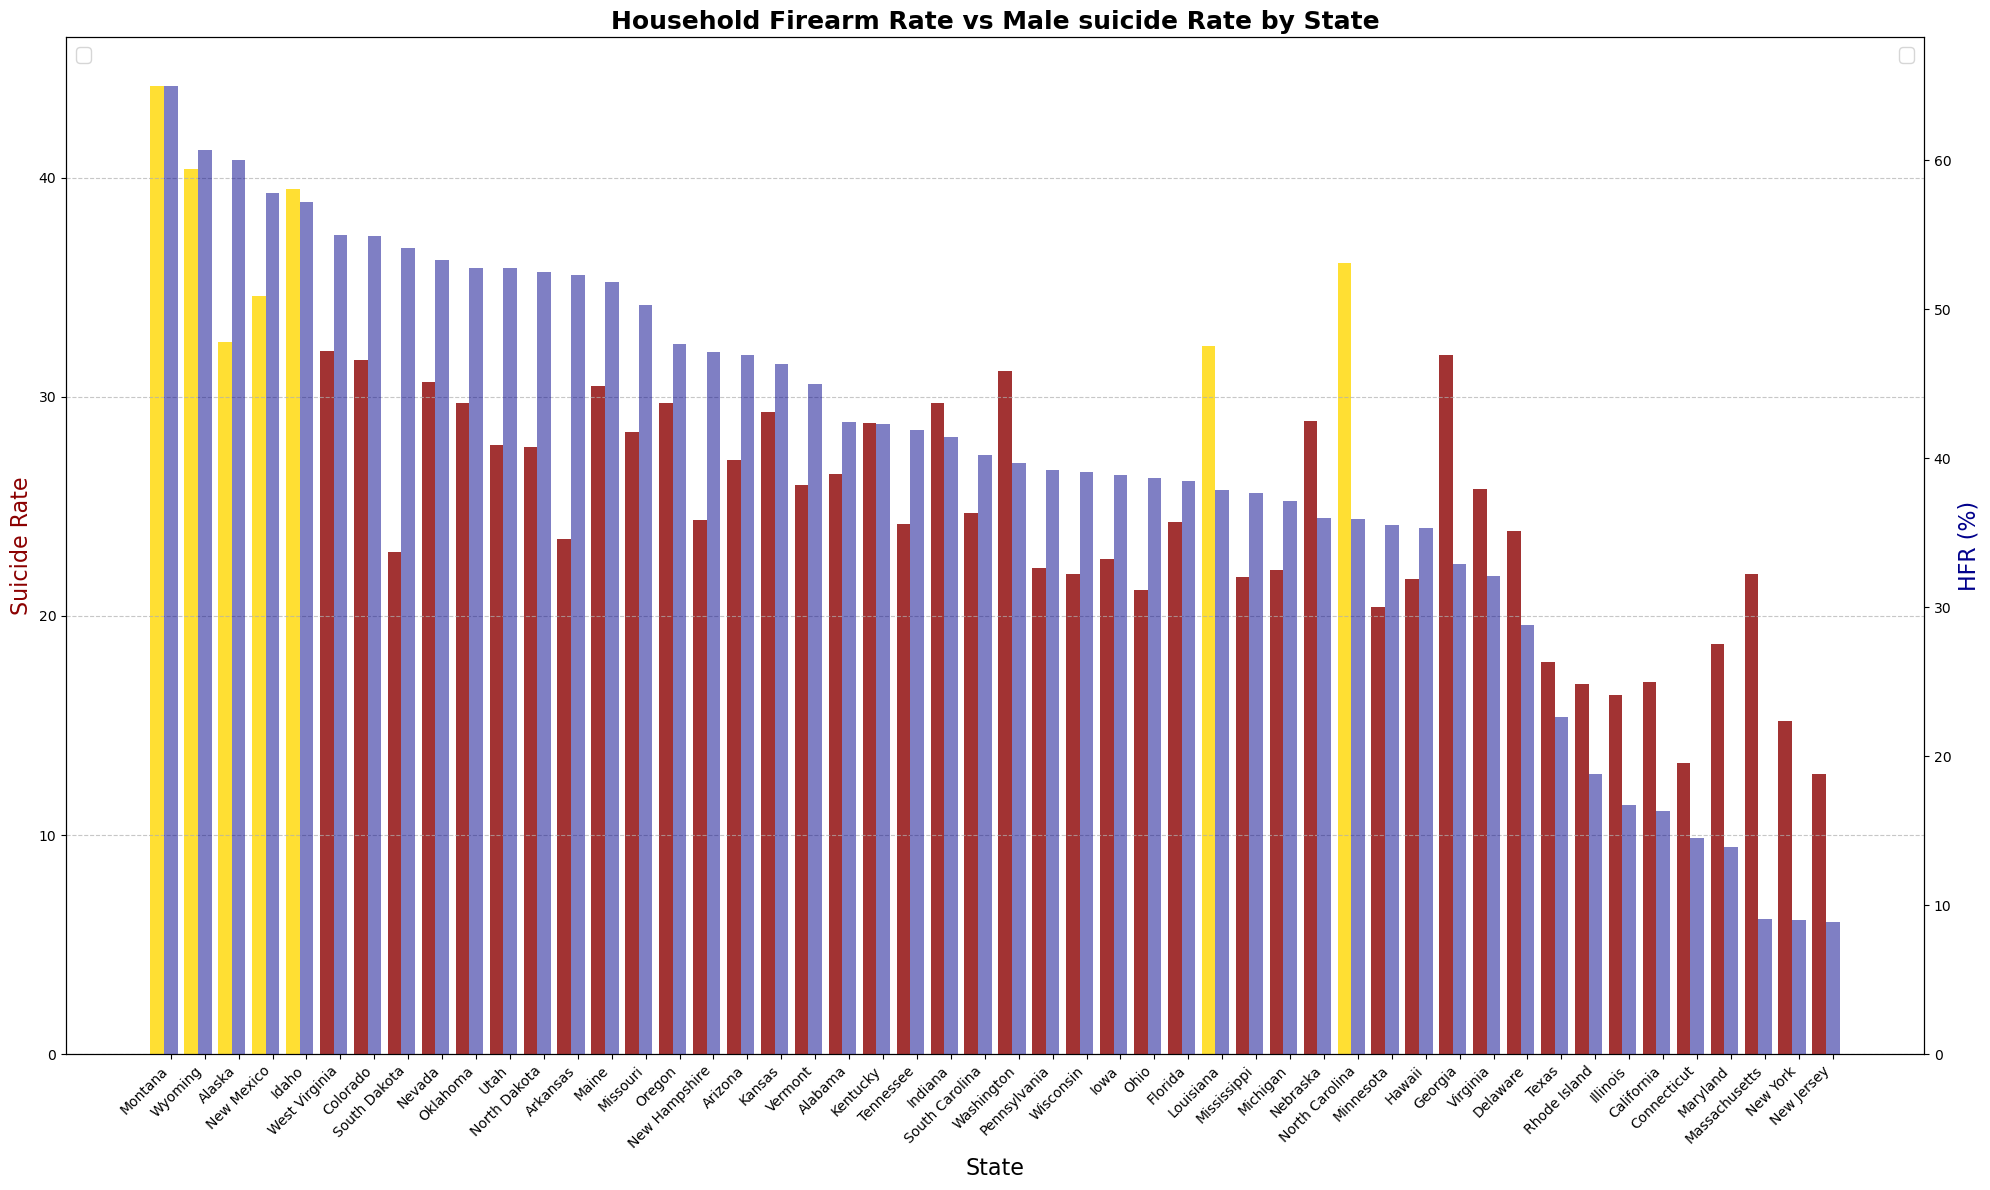

In [ ]:
#Figure 2 is my remix of the original Data Viz.

# Sort by HFR for a logical comparison
merged_data = merged_data.sort_values(by='HFR', ascending=False)

# Define figure
fig, ax1 = plt.subplots(figsize=(20, 12))

# Bar width
bar_width = 0.4
index = np.arange(len(merged_data))

# Define color scheme
suicide_color = 'darkred'  # Suicide rate bars
hfr_color = 'darkblue'  # HFR bars
highlight_color = 'gold'  # For states with highest suicide rates

# Identify states with the highest suicide rates (top 7)
top_suicide_states = merged_data.nlargest(7, 'Crude Rate')['STATE']

# Plot Crude Rate (left y-axis)
bars1 = ax1.bar(index, merged_data['Crude Rate'], bar_width, color=[highlight_color if state in top_suicide_states.values else suicide_color for state in merged_data['STATE']], label='Suicide Rate', alpha=0.8)

# Second y-axis for HFR
ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width, merged_data['HFR'] * 100, bar_width, label='HFR (%)', color=hfr_color, alpha=0.5)

# Sort data by Crude Rate for logical comparison
merged_data = merged_data.sort_values(by='Crude Rate', ascending=False)

# Highlight high-suicide-rate states with annotations
for i, state in enumerate(merged_data['STATE']):
    if state in top_suicide_states:
        ax1.text(index[i], merged_data['Crude Rate'].iloc[i] + 0.5, state, ha='center', fontsize=12, fontweight='bold', color='black')



# Add labels and title
ax1.set_xlabel('State', fontsize=16)
ax1.set_ylabel('Suicide Rate', fontsize=16, color=suicide_color)
ax2.set_ylabel('HFR (%)', fontsize=16, color=hfr_color)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

ax1.legend(handles=[bars1[0]], loc='upper left', fontsize=14)
ax2.legend(handles=[bars2[0]], loc='upper right', fontsize=14)

ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(merged_data['STATE'], rotation=45, ha='right')
plt.tight_layout(pad=3.0)

plt.title('Household Firearm Rate vs Male suicide Rate by State', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()
